# Linear Regression

# About Dataset
Car Price Prediction Dataset Description:                                                                                         

This dataset contains 10,000 entries created for the purpose of predicting car prices. Each row represents information about a car and its price. The descriptions of the columns are as follows:                                                                                           

# Columns Descriptions:                                                                                                    

Brand: Specifies the brand of the car (e.g., Toyota, BMW, Ford).                                                                                
Example values: "Toyota", "BMW", "Mercedes".                                                                                                        

Model: Specifies the model of the car (e.g., Corolla, Focus, X5).                                                                                       
Example values: "Corolla", "Focus", "X5".                                                                                                             

Year: The production year of the car. Newer years typically indicate higher prices.                                                                    
Example values: 2005, 2018, 2023.                                                                                                                      

Engine_Size: Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.                                           
Example values: 1.6, 2.0, 3.5.                                                                                                                         

Fuel_Type: indicates the type of fuel used by the car:                                                                                                  
Petrol: Cars running on gasoline.                                                                                                                      
Diesel: Cars running on diesel fuel.                                                                                                                    
Hybrid: Cars that use both fuel and electricity.                                                                                                        
Electric: Fully electric cars.                                                                                                                          

Transmission: The type of transmission in the car:                                                                                                      
Manual: Manual transmission.                                                                                                                            
Automatic: Automatic transmission.                                                                                                                      
Semi-Automatic: Semi-automatic transmission.                                                                                                           

Mileage: The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.                             
Example values: 15,000, 75,000, 230,000.                                                                                                                

Doors: The number of doors in the car. Commonly 2, 3, 4, or 5 doors.                                                                                    
Example values: 2, 3, 4, 5.                                                                                                                             

Owner_Count: The number of previous owners of the car. Fewer owners generally indicate a higher price.                                                  Example values: 1, 2, 3, 4.                                                                                                                            

Price:The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.                                                                                                                                  
Example values: 5,000, 15,000, 30,000.

#  Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the Dataset

In [8]:
data = pd.read_csv("car_price_dataset.csv")

# Data Information

In [12]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


# Data Preprocessing

In [11]:
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

# Encoding Categorical Variables
Since columns like Brand, Model, Fuel_Type, and Transmission are categorical, we convert them using One-Hot Encoding.

In [15]:
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Splitting Features and Target

In [18]:
X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target variable

# Scaling Numerical Features

In [19]:
scaler = StandardScaler()
X[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']] = scaler.fit_transform(
    X[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']]
)

# Train-Test Split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 # Train the Linear Regression Model

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [22]:
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


Mean Absolute Error (MAE): 20.00
Mean Squared Error (MSE): 4213.92
Root Mean Squared Error (RMSE): 64.91
R-squared Score (R²): 0.9995


# Visualizing Predictions

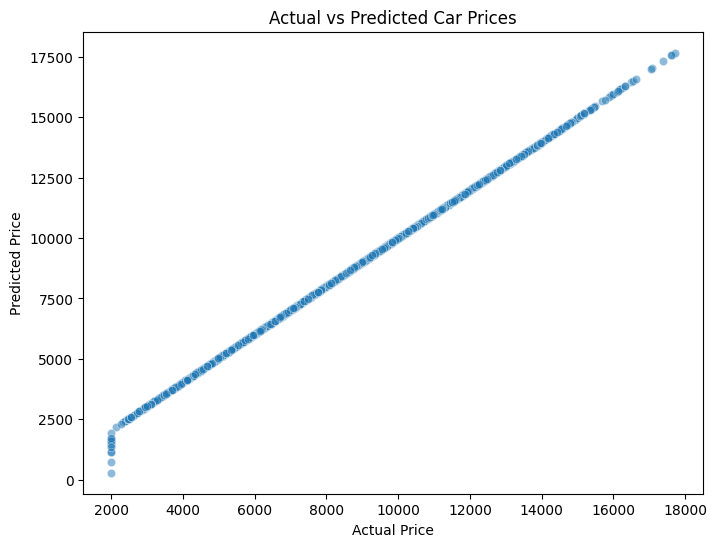

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

# Conclusion of Car Price Prediction Model
The Linear Regression model performs exceptionally well, with an R² score of 0.9995, meaning it explains 99.95% of the variance in car prices. The low MAE (20.00) and RMSE (64.91) indicate accurate predictions. However, the high R² suggests potential overfitting, so further validation and testing on unseen data are recommended.